# Quad 45 eval

**Goal:** We reached a (mostly) concensus yesterday that we liked the 45 degree quads for pushing forward. The "open tasks" that I had signed up for were:

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoLocator, AutoMinorLocator, MultipleLocator,FixedLocator, LogLocator

import os
from glob import glob

import os
os.sys.path += ['../non-resonant-studies', "../PyATLASstyle/", "../stats-results/"]

from quad45_2x2 import res_bin_edges

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Check the binning: (2 options)**
- 2x2
- 3x2


**Goal:** Find a reasonable schema (for 4b) for the jobs that I'll submit!!

- Then I'll do the same thing for 3b1f
- Hopefully rev_deta_hh will j be a turning of the crank @ this point


**Metrics:**
- Post-fit (bkg only, 4b + 3b1f)
- Pulls (bkg only, 4b + 3b1f)
- Pulls (S+B)


ETA: 1 day!!
(I am turning the crank here :) )

**In line with this suite of studies, w/ the updated scheme, trying to A the Q *can we correleate or not* by looking at:**
- downsample the stats in the fits
- quad and quadNP results


(But if they look like this, probably)

**Run post-fit and pulls for 3b1f...**

Oh, I *can* do this in one step w/ the new functionality I added to Sean's script :)


In [10]:
%%bash 
ls ../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08*_Q45_2x2*

../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_Q45_2x2.json
../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_Q45_2x2_b_only_postfit.json
../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_Q45_2x2_b_only_pulls.csv
../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_Q45_2x2_postfit.json
../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_Q45_2x2_pulls.csv
../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2.json
../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2_b_only_postfit.json
../stats-results/Q45/ws-3b1f-systs-HTcut-300.0-bkg-0.1-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2_b_only_pulls.csv


In [11]:
# Change directory to non-resonant
os.chdir('../non-resonant-studies/')

for ws_in in glob('../stats-results/Q45/ws-4b*_rev_deta_Q45_2x2*.json'):
    if 'postfit' in ws_in: continue

    cmd = f'python run_pulls.py -i {ws_in} --pulls --bkgd-only'

    if not os.path.exists(ws_in.replace('.json',f'_b_only_pulls.csv')):
        print(cmd)
        os.system(cmd)
            
# cd back here to avoid fucking up the plotting scripts :)
os.chdir('../cryptotuples/')

python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2.json --pulls --bkgd-only
python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-m_h1cut-124.0-m_h2cut-117.0-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2.json --pulls --bkgd-only
python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-m_h1cut-124.0-m_h2cut-117.0-dEta_hh-cat-corr-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2_corr.json --pulls --bkgd-only
python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-HTcut-300.0-dEta_hh-cat-corr-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2_corr.json --pulls --bkgd-only


# Pulls 

**Load in the pull files!**

In [14]:
pullDict = {}

for pull_file in glob('../stats-results/Q45/ws-*unblind*_pulls.csv'):

    base_name = os.path.splitext(pull_file.split('/')[-1])[0]
    
    keys = base_name.split('-')
    
    bcat = keys[1]
    syst = keys[3]
    
    label = keys[-1]
    
    if 'Q45_2x2' not in label: continue
    
    key = label.replace('res_p08','').replace('_Q45_2x2','').replace('_pulls','')
    
    pullDict[f'{bcat}-{syst}{key}'] = pd.read_csv(pull_file)
    

In [15]:
pullDict.keys()

dict_keys(['4b-m_h1cut_rev_deta_b_only', '4b-HTcut_rev_deta_b_only', '4b-HTcut_rev_deta_corr_b_only', '3b1f-HTcut_rev_deta_corr_b_only', '3b1f-HTcut', '3b1f-m_h1cut_rev_deta_corr_b_only', '3b1f-m_h1cut_corr', '3b1f-m_h1cut_corr_b_only', '3b1f-HTcut_corr', '3b1f-HTcut_b_only', '4b-m_h1cut_rev_deta_corr_b_only', '3b1f-HTcut_rev_deta_b_only', '3b1f-m_h1cut_b_only', '3b1f-m_h1cut', '3b1f-m_h1cut_rev_deta_b_only', '3b1f-HTcut_corr_b_only'])

**Make the pull plots**

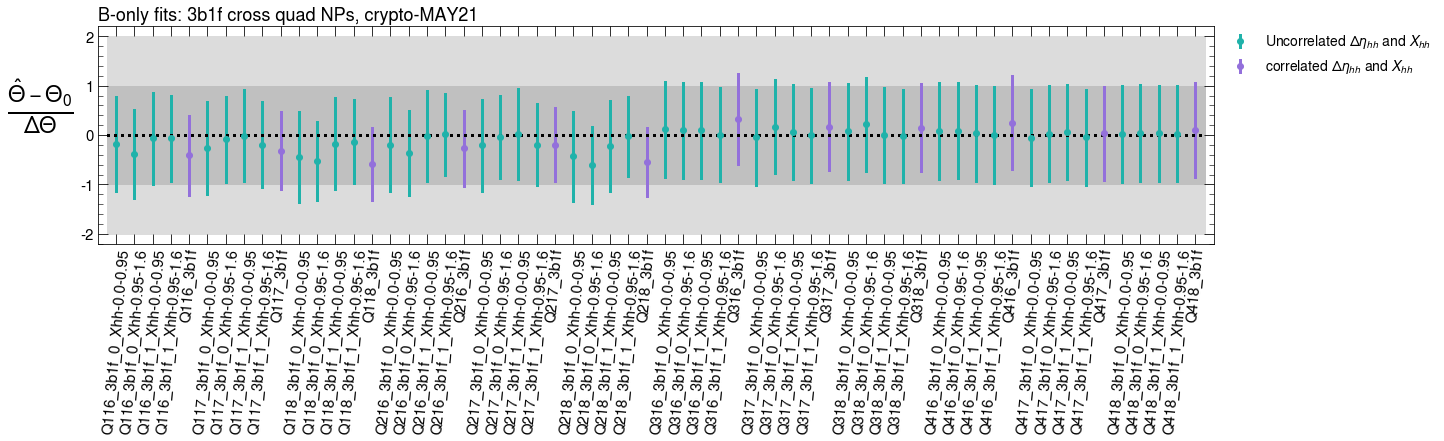

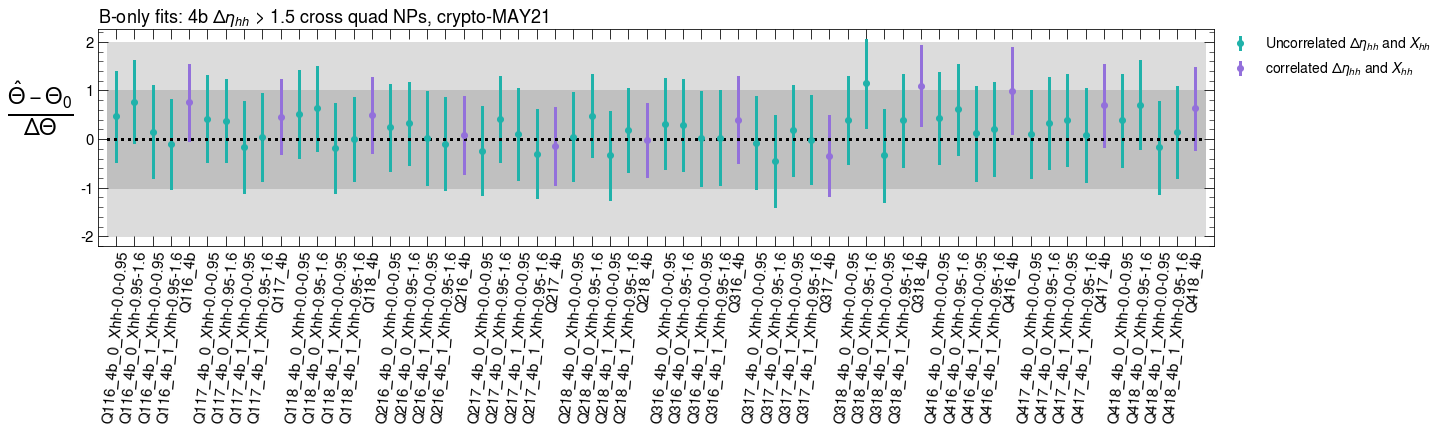

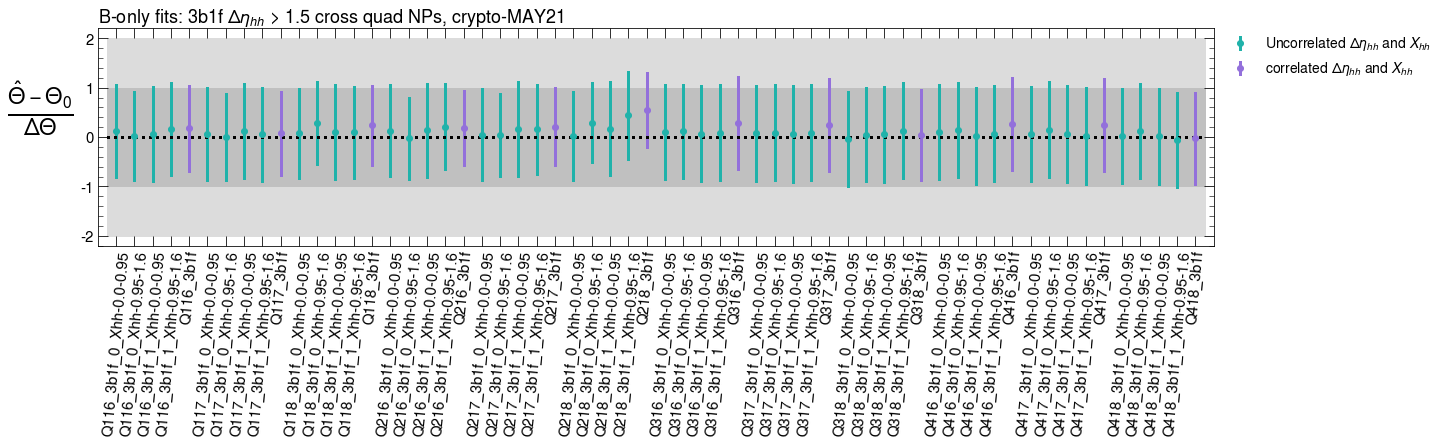

In [16]:
# Cross NPs
for base in ['3b1f-m_h1cut{}_b_only','4b-m_h1cut_rev_deta{}_b_only','3b1f-m_h1cut_rev_deta{}_b_only']:

    plt.figure(figsize=(20,4))

    xx = np.arange(60)

    m = np.ones_like(xx).astype(bool)
    m[4::5] = False

    x1 = xx[ m]
    x2 = xx[~m]

    kwargs = {'marker':'o','lw':0,'elinewidth':3}

    o_uu = pullDict[base.format('')]
    o_cc = pullDict[base.format('_corr')]
    plt.errorbar(x1, o_uu[:48].pull, o_uu[:48].err, color='lightseagreen', 
                 label='Uncorrelated $\Delta \eta_{hh}$ and $X_{hh}$', **kwargs)
    plt.errorbar(x2, o_cc[:12].pull,  o_cc[:12].err,  color='mediumpurple', 
                 label='correlated $\Delta \eta_{hh}$ and $X_{hh}$', **kwargs)

    r = [-0.5,len(xx)-0.5]
    plt.fill_between(r,-2,2,color='gainsboro')
    plt.fill_between(r,-1,1,color='silver')
    plt.plot(r,[0]*2,'k',ls='dotted')#
    plt.xlim(-1,len(xx))

    plt.ylabel(r'$\frac{\hat{\Theta} - \Theta_0}{\Delta \Theta}$',rotation=0,fontsize=32,labelpad=40)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1.03))

    ax = plt.gca()
    ax.xaxis.set_major_locator(FixedLocator(xx))
    ax.tick_params(axis='x',which='minor', length=0)

    labels = []

    for i in range(12):

        labels += list(o_uu[i*4: (i+1)*4].label.values)
        labels.append( o_cc.loc[i,'label'] )

    plt.xticks(xx,labels, rotation=85)

    
    if '_rev_deta' in base:
            tag='_rev_deta' 
            ti = ' $\Delta \eta_{hh}$ > 1.5'
    else:
        tag='' 
        ti = ''
    
    bcat = base.split('-')[0]
    plt.title(f'B-only fits: {bcat}{ti} cross quad NPs, crypto-MAY21',loc='left')
    
    #plt.savefig(f'{figDir}/crossNPs/pulls_{bcat}{tag}_{yr}_b_only.pdf',bbox_inches='tight')
    plt.show()

In [ ]:
%%bash
python ../non-resonant-studies/run_pulls.py -h

In [18]:
edg = [294, 315, 337, 361, 386, 413, 442, 473, 506, 541, 579, 620, 663, 709, 759, 812, 869, 930, 995]

bStr = ' '.join([str(ei) for ei in edg])

In [27]:
# Change directory to non-resonant
os.chdir('../non-resonant-studies/')

for ws_in in glob('../stats-results/Q45/ws-4b-*unblind*_rev_deta_Q45*.json'):
    if 'postfit' in ws_in: continue
    
    cmd = f'python run_pulls.py -i {ws_in} --postfit --bkgd-only --bins {bStr} -y 16 17 18 --bcat 4b'

    if not os.path.exists(ws_in.replace('.json',f'_b_only_postfit.csv')):
        print(cmd)
        #os.system(cmd)
            
# cd back here to avoid fucking up the plotting scripts :)
os.chdir('../cryptotuples/')

python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2.json --postfit --bkgd-only --bins 294 315 337 361 386 413 442 473 506 541 579 620 663 709 759 812 869 930 995 -y 16 17 18 --bcat 4b
python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-m_h1cut-124.0-m_h2cut-117.0-dEta_hh-cat-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2.json --postfit --bkgd-only --bins 294 315 337 361 386 413 442 473 506 541 579 620 663 709 759 812 869 930 995 -y 16 17 18 --bcat 4b
python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-m_h1cut-124.0-m_h2cut-117.0-dEta_hh-cat-corr-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2_corr.json --postfit --bkgd-only --bins 294 315 337 361 386 413 442 473 506 541 579 620 663 709 759 812 869 930 995 -y 16 17 18 --bcat 4b
python run_pulls.py -i ../stats-results/Q45/ws-4b-systs-HTcut-300.0-dEta_hh-cat-corr-16-17-18-SM-HH-unblind-res_p08_rev_deta_Q45_2x2_corr.json --postfit --bkgd-only --bins 294 31

In [28]:
histDict = {}

for postfit_file in glob('../stats-results/Q45/ws-*_postfit.json'):

    base_name = os.path.splitext(postfit_file.split('/')[-1])[0]
    
    keys = base_name.split('-')
    
    bcat = keys[1]
    syst = keys[3]
    
    label = keys[-1]
    
    if 'Q45_2x2' not in label: continue
    
    key = label.replace('res_p08','').replace('_Q45_2x2','').replace('_postfit','')
    
    with open(postfit_file) as f:
        histDict[f'{bcat}-{syst}{key}'] = json.load(f)
    

In [29]:
histDict.keys()

dict_keys(['4b-HTcut_b_only', '4b-m_h1cut_rev_deta_corr_b_only', '3b1f-m_h1cut_corr_b_only', '3b1f-m_h1cut_rev_deta_b_only', '4b-HTcut_rev_deta_corr_b_only', '4b-HTcut_rev_deta_b_only', '3b1f-m_h1cut_b_only', '4b-m_h1cut_corr_b_only', '3b1f-HTcut_rev_deta_b_only', '3b1f-HTcut', '4b-HTcut_corr_b_only', '4b-m_h1cut_rev_deta_b_only', '3b1f-HTcut_corr_b_only', '3b1f-m_h1cut_rev_deta_corr_b_only', '3b1f-HTcut_corr_bkg_only', '3b1f-HTcut_b_only', '4b-m_h1cut_b_only', '3b1f-HTcut_rev_deta_corr_b_only'])

In [30]:
histDict['3b1f-m_h1cut_corr_b_only'].keys()

dict_keys(['hists', 'bcat', 'cat_labels', 'bins', 'mu', 'nll', 'pre_nll'])

In [31]:
cat_to_lab = {
    '0': 'dEta_hh-0-0.75',
    '1': 'dEta_hh-0.75-1.5'
}

In [32]:
figDir = 'figures/ggF_PUSH/correlateShape'

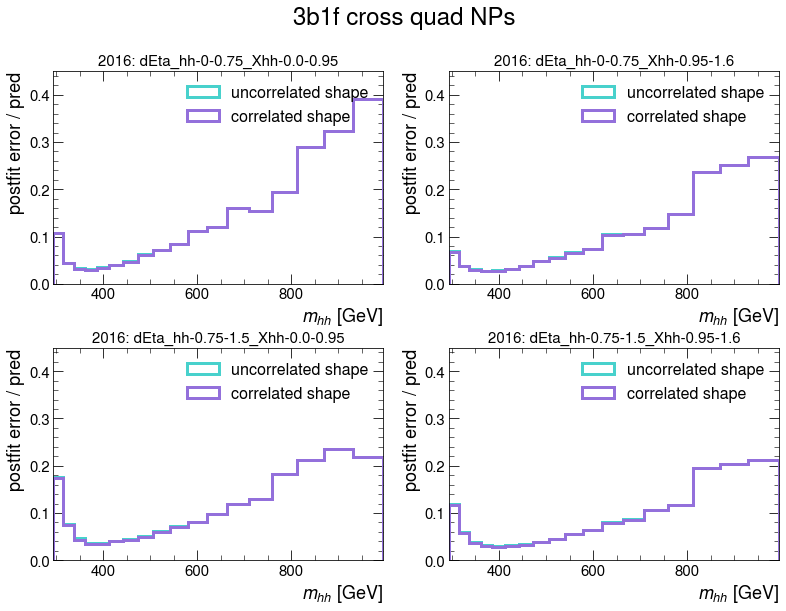

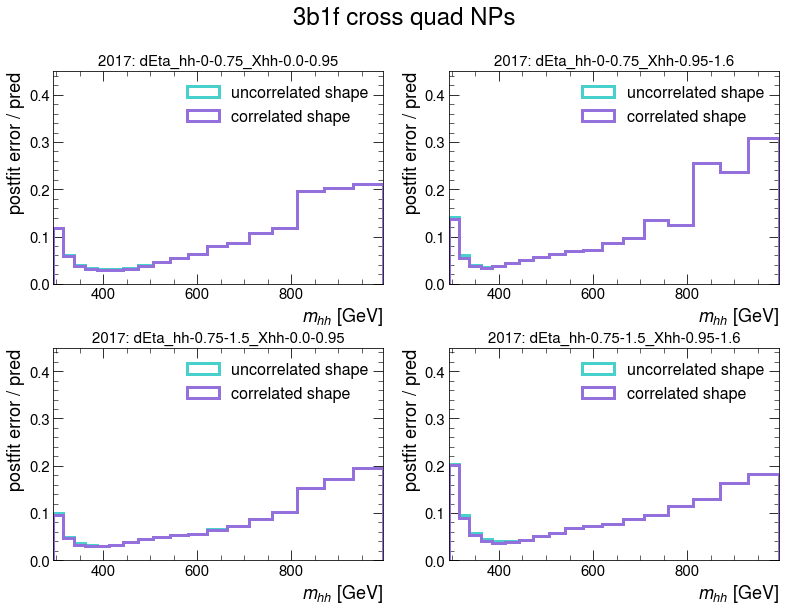

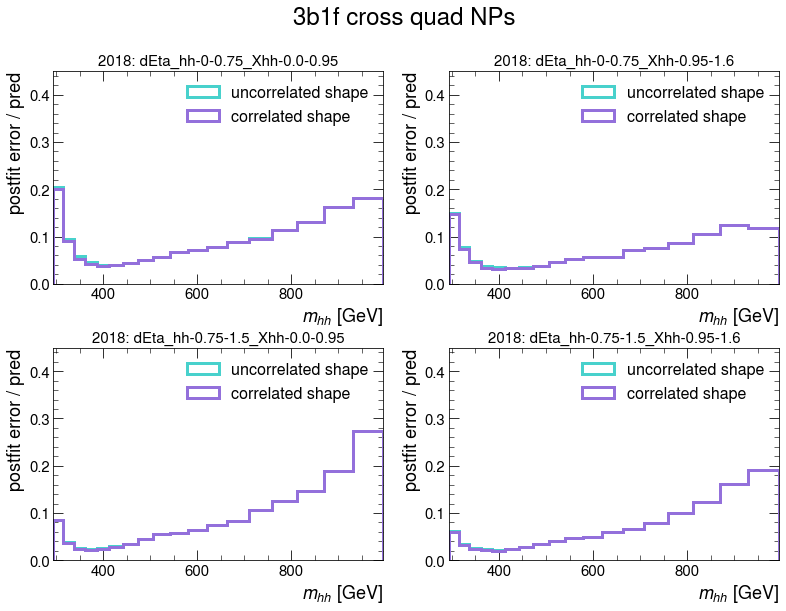

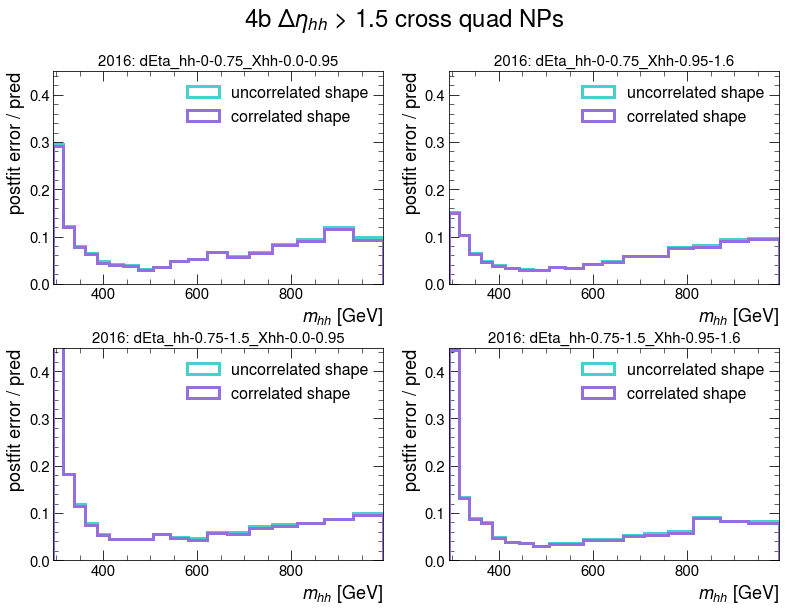

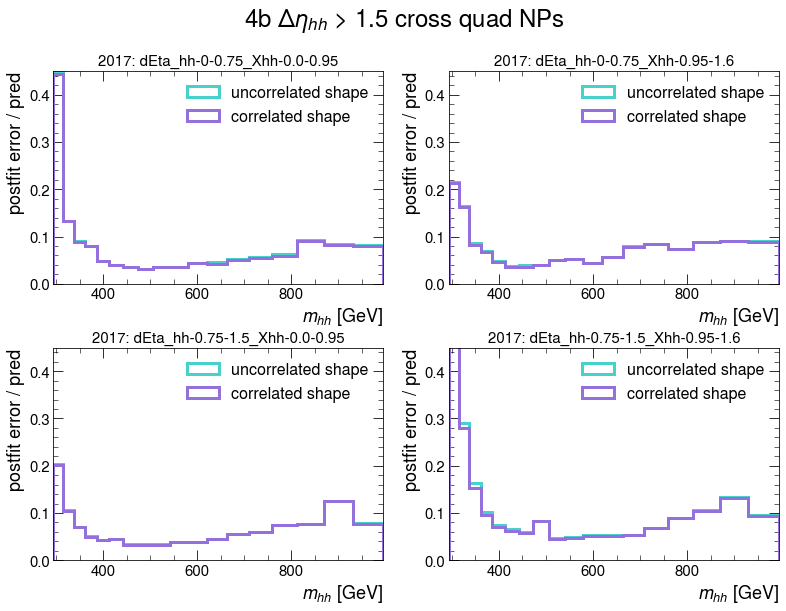

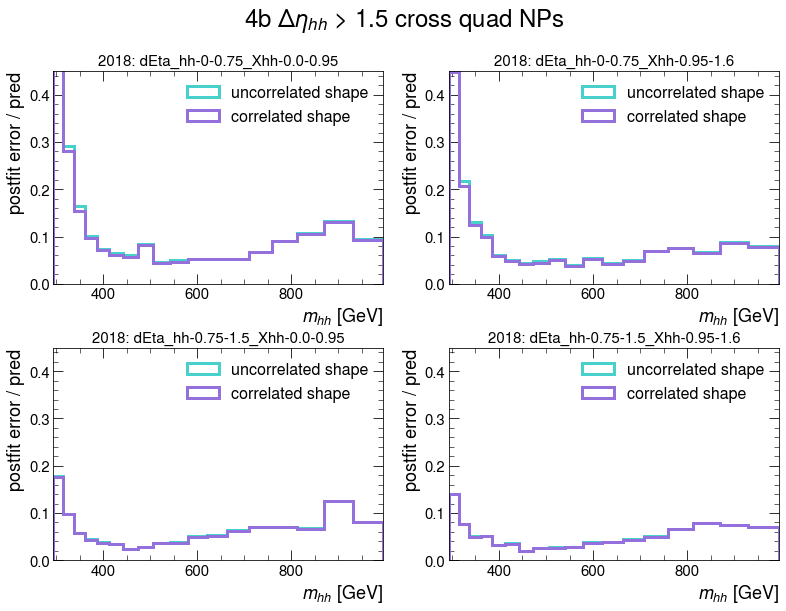

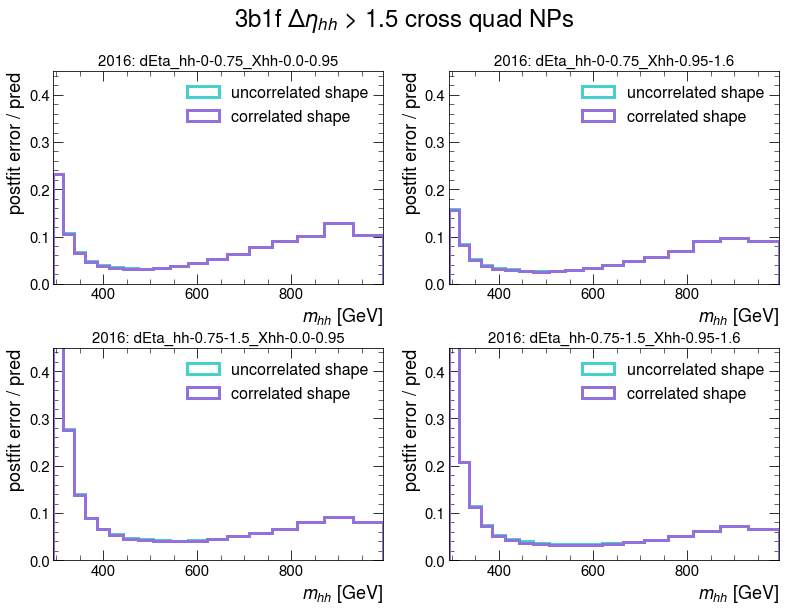

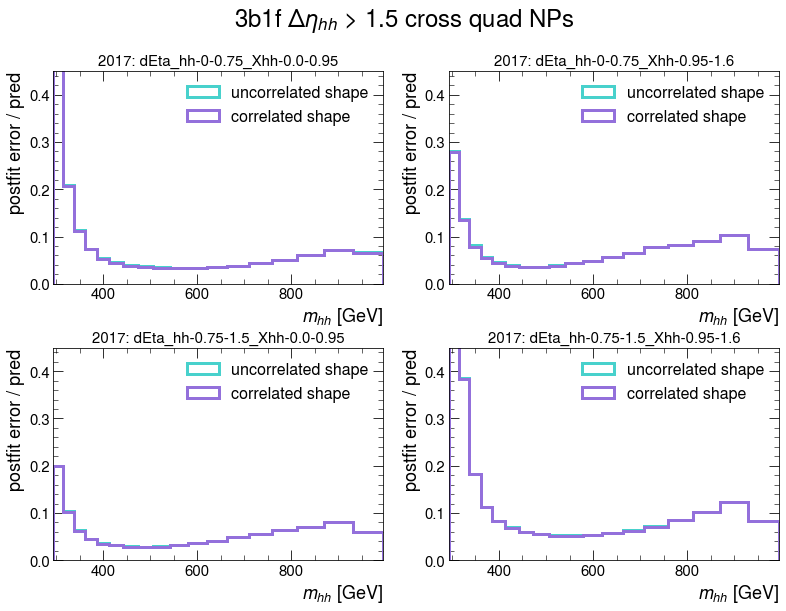

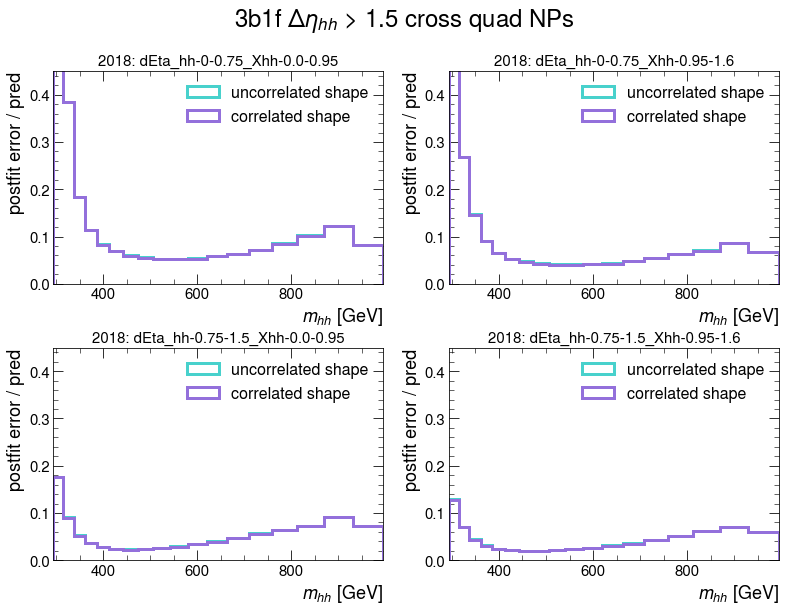

In [33]:
for base in ['3b1f-m_h1cut{}_b_only','4b-m_h1cut_rev_deta{}_b_only','3b1f-m_h1cut_rev_deta{}_b_only']:

    myDict = histDict[base.format('')]

    e = np.array(myDict['bins'])
    cat_labels = myDict['cat_labels']
    bcat = myDict['bcat']

    xx = 0.5 * (e[1:] + e[:-1])

    for yr in ['16','17','18']:

        fig, axes = plt.subplots(2,2,figsize=(13,9),
                                 gridspec_kw={"wspace":0.2,"hspace":0.3})

        for i, (ax, cat_lab) in enumerate(zip(axes.flatten(), cat_labels)):

            title = cat_to_lab[cat_lab[0]]+cat_lab[1:]
            
            for tag, c,l in zip(['','_corr'],['mediumturquoise','mediumpurple'],
                                ['uncorrelated shape','correlated shape']):
                key = base.format(tag)

                d = histDict[key]['hists'][yr]

                b  = np.array(d[i]['post'])
                db = np.array(d[i]['post_err'])

                ax.hist(xx,e,histtype='step',lw=3,weights=db/b,color=c,label=l)

            ax.legend(fontsize=16,loc='best')
            ax.set_xlabel('$m_{hh}$ [GeV]',x=1,ha='right',fontsize=18)
            ax.set_ylabel('postfit error / pred',y=1,ha='right',fontsize=18)
            ax.set_title(f'20{yr}: '+title,fontsize=15)

            ax.set_ylim(0,0.45)
            ax.set_xlim(e[0],e[-1])
            
        if '_rev_deta' in base:
            tag='_rev_deta' 
            ti = ' $\Delta \eta_{hh}$ > 1.5'
        else:
            tag='' 
            ti = ''
        fig.suptitle(f'{bcat}{ti} cross quad NPs',va='top',fontsize=24)

        plt.savefig(f'{figDir}/crossNPs/postRelErr_{bcat}{tag}_{yr}_b_only.pdf',bbox_inches='tight')

**Cool - so I *think* these are the plots that Max wants to see...**

Next - let's do the same thing w/ the HT split!

In [34]:
histDict.keys()

dict_keys(['4b-HTcut_b_only', '4b-m_h1cut_rev_deta_corr_b_only', '3b1f-m_h1cut_corr_b_only', '3b1f-m_h1cut_rev_deta_b_only', '4b-HTcut_rev_deta_corr_b_only', '4b-HTcut_rev_deta_b_only', '3b1f-m_h1cut_b_only', '4b-m_h1cut_corr_b_only', '3b1f-HTcut_rev_deta_b_only', '3b1f-HTcut', '4b-HTcut_corr_b_only', '4b-m_h1cut_rev_deta_b_only', '3b1f-HTcut_corr_b_only', '3b1f-m_h1cut_rev_deta_corr_b_only', '3b1f-HTcut_corr_bkg_only', '3b1f-HTcut_b_only', '4b-m_h1cut_b_only', '3b1f-HTcut_rev_deta_corr_b_only'])

In [35]:
# Function from Jannicke :)
# 30th June 2021

def multipage(filename, figs=None, dpi=200):
    """Creates a pdf with one page per plot"""
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        plt.figure(fig).savefig(pp, format='pdf')
    pp.close()
    
    # Save output to pdf 
#multipage("test.pdf", figs=plt.get_fignums(), dpi=200)

<Figure size 432x288 with 0 Axes>

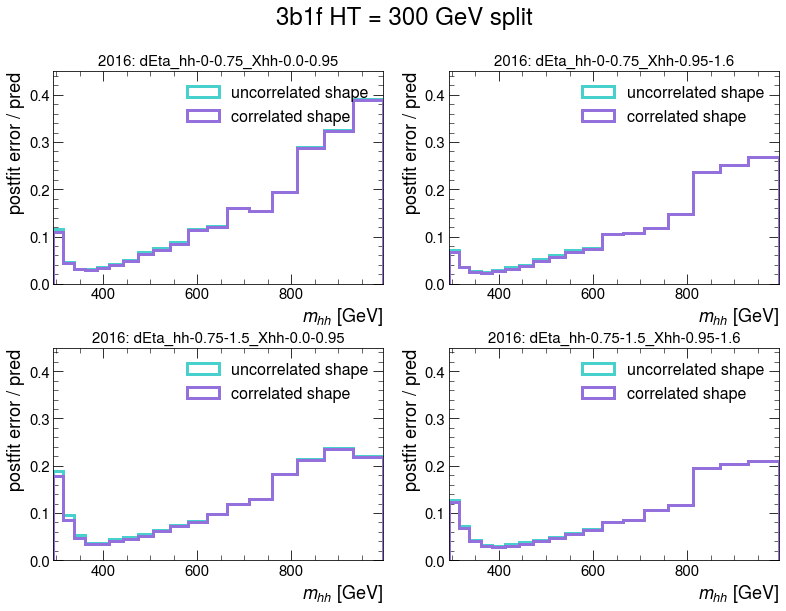

<Figure size 432x288 with 0 Axes>

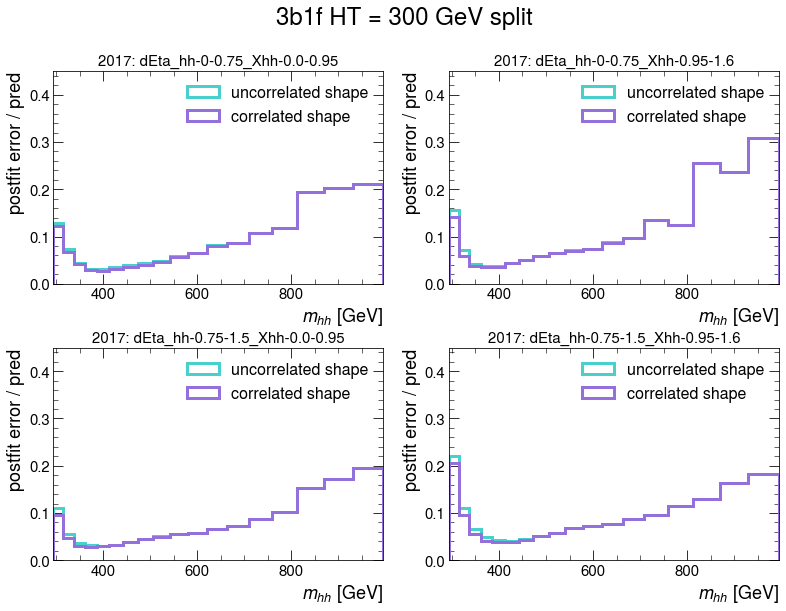

<Figure size 432x288 with 0 Axes>

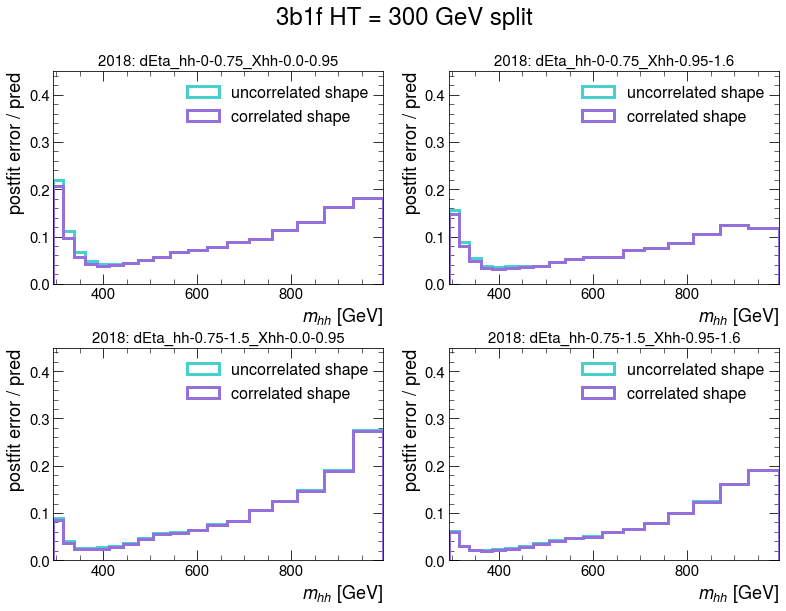

<Figure size 432x288 with 0 Axes>

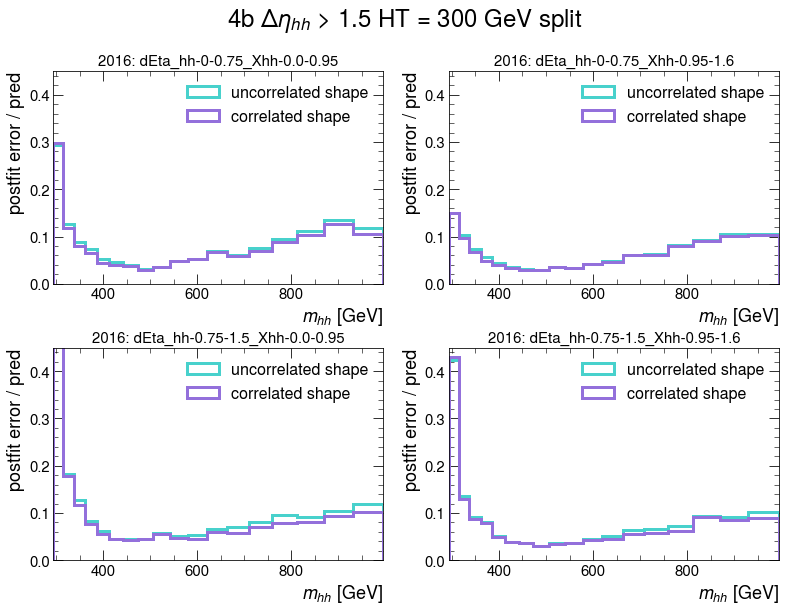

<Figure size 432x288 with 0 Axes>

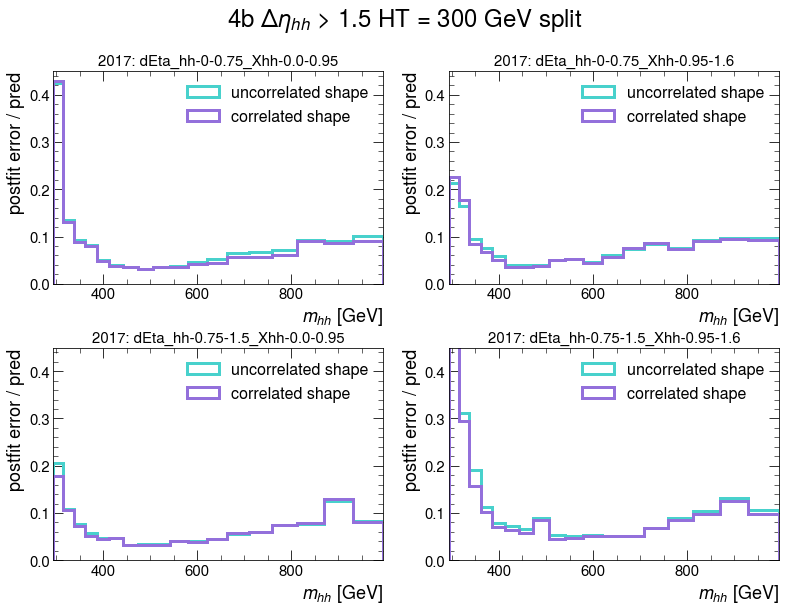

<Figure size 432x288 with 0 Axes>

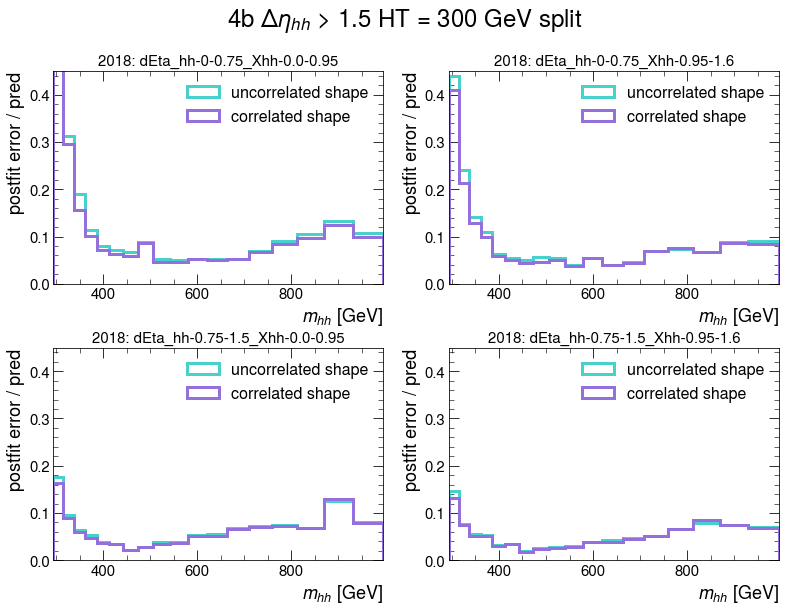

<Figure size 432x288 with 0 Axes>

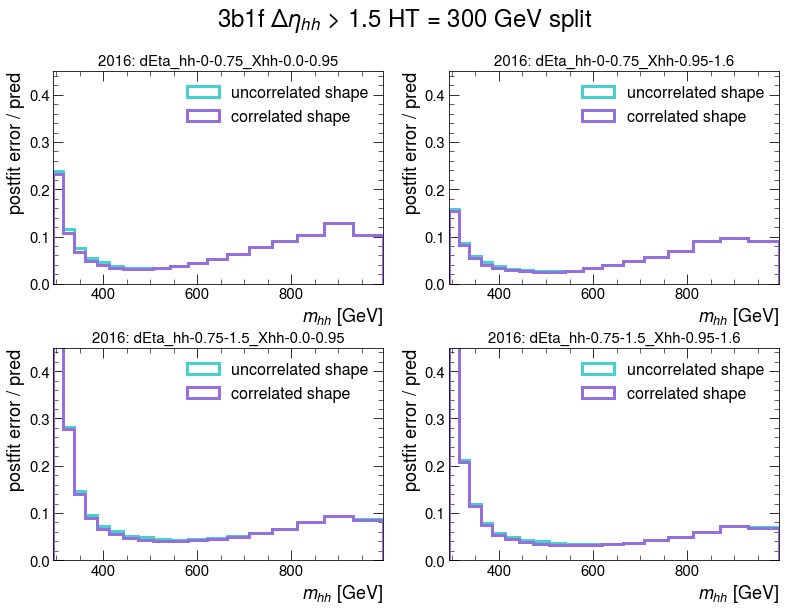

<Figure size 432x288 with 0 Axes>

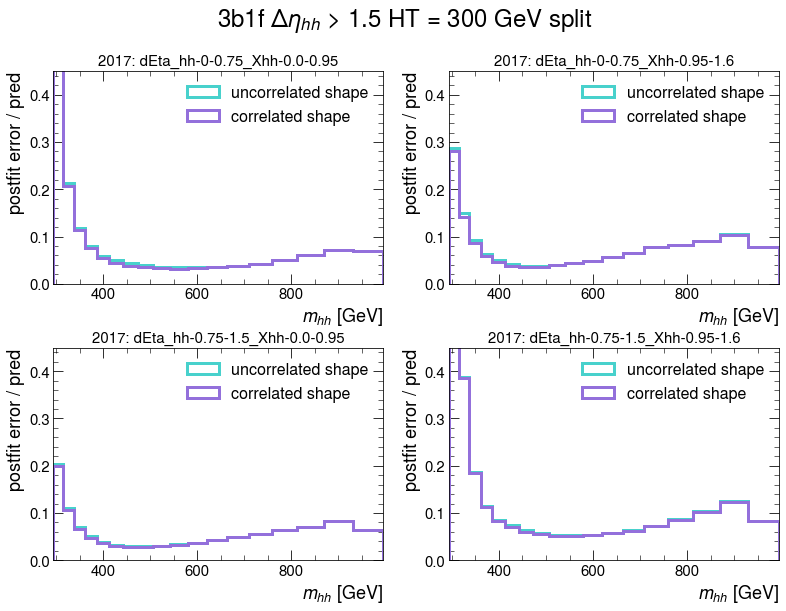

<Figure size 432x288 with 0 Axes>

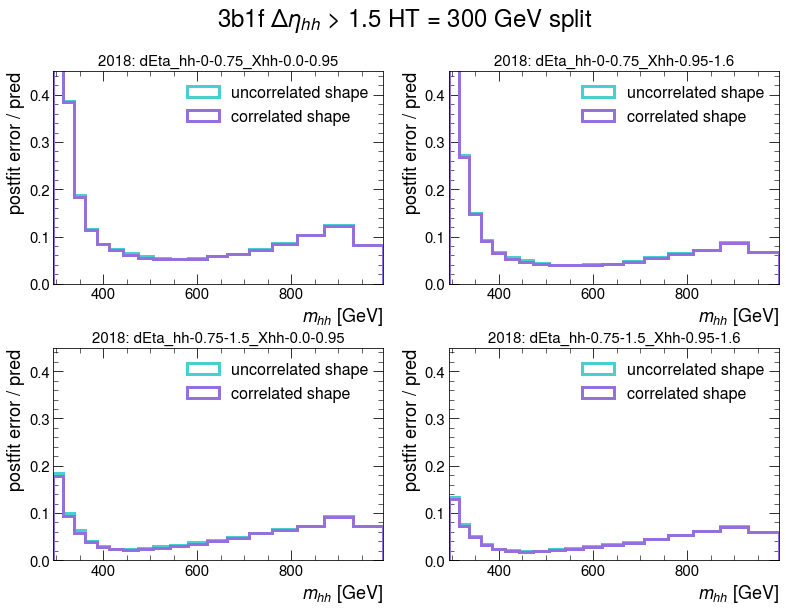

In [36]:
for base in ['3b1f-HTcut{}_b_only','4b-HTcut_rev_deta{}_b_only','3b1f-HTcut_rev_deta{}_b_only']:

    myDict = histDict[base.format('')]

    e = np.array(myDict['bins'])
    cat_labels = myDict['cat_labels']
    bcat = myDict['bcat']

    xx = 0.5 * (e[1:] + e[:-1])

    for yr in ['16','17','18']:

        plt.figure()
        fig, axes = plt.subplots(2,2,figsize=(13,9),
                                 gridspec_kw={"wspace":0.2,"hspace":0.3})

        for i, (ax, cat_lab) in enumerate(zip(axes.flatten(), cat_labels)):

            title = cat_to_lab[cat_lab[0]]+cat_lab[1:]
            
            for tag, c,l in zip(['','_corr'],['mediumturquoise','mediumpurple'],
                                ['uncorrelated shape','correlated shape']):
                key = base.format(tag)

                d = histDict[key]['hists'][yr]

                b  = np.array(d[i]['post'])
                db = np.array(d[i]['post_err'])

                ax.hist(xx,e,histtype='step',lw=3,weights=db/b,color=c,label=l)

            ax.legend(fontsize=16,loc='best')
            ax.set_xlabel('$m_{hh}$ [GeV]',x=1,ha='right',fontsize=18)
            ax.set_ylabel('postfit error / pred',y=1,ha='right',fontsize=18)
            ax.set_title(f'20{yr}: '+title,fontsize=15)

            ax.set_ylim(0,0.45)
            ax.set_xlim(e[0],e[-1])
            
        if '_rev_deta' in base:
            tag='_rev_deta' 
            ti = ' $\Delta \eta_{hh}$ > 1.5'
        else:
            tag='' 
            ti = ''
        fig.suptitle(f'{bcat}{ti} HT = 300 GeV split',va='top',fontsize=24)

        plt.savefig(f'{figDir}/HT/postRelErr_{bcat}{tag}_{yr}_b_only.pdf',bbox_inches='tight')
        


**In the meantime...**

Could I have some *validation* plots for the 3b1f limits (at least)?